<a href="https://colab.research.google.com/github/Zypher44/RaduIntuneric/blob/master/ConvolutionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip file 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-30 00:26:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   127MB/s    in 0.8s    

2021-06-30 00:26:30 (127 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



#Inspect the data 

a very curical step at the begining of every machine learning project is becoming one with the data, 
visualse many samples of your data 

In [2]:
!ls pizza_steak/train

pizza  steak


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os 

#Walk through pizza steak directory and list number of files 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories {len(filenames)} images in '{dirpath}'.")

There are 2 directories 1 images in 'pizza_steak'.
There are 2 directories 1 images in 'pizza_steak/train'.
There are 0 directories 750 images in 'pizza_steak/train/pizza'.
There are 0 directories 750 images in 'pizza_steak/train/steak'.
There are 2 directories 1 images in 'pizza_steak/test'.
There are 0 directories 250 images in 'pizza_steak/test/pizza'.
There are 0 directories 250 images in 'pizza_steak/test/steak'.


In [5]:
#Another way to find out how many images in a file 

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

#To visulaize our images first lets get te class names programmitically

In [6]:
#Get the class names programmatically 

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Create a list of class_names from the subdirecdires
class_names = class_names[1:] #Removee .Ds_Store
print(class_names)

['pizza' 'steak']


In [7]:
#Lets visualize our images 

import matplotlib.pyplot as plt 

import matplotlib.image as mpimg
import random 

def view_random_image(target_dir,target_class):
  #Set the target directory (we'll view images here)
  target_folder = target_dir+target_class

  #Get a random image path 

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in image and plot with matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img



['2844278.jpg']
Image shape: (512, 512, 3)


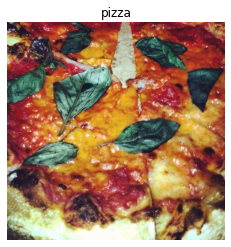

In [8]:
#View random image from training dataset

img = view_random_image(target_dir='pizza_steak/train/',

                        target_class='pizza')

In [9]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 26,  25,  41],
        [ 23,  22,  36],
        [ 27,  30,  37],
        ...,
        [140,  75,  47],
        [157,  89,  54],
        [157,  85,  45]],

       [[ 23,  20,  37],
        [ 24,  23,  37],
        [ 24,  27,  34],
        ...,
        [129,  59,  34],
        [145,  72,  40],
        [143,  69,  34]],

       [[ 19,  15,  32],
        [ 26,  24,  38],
        [ 22,  22,  32],
        ...,
        [132,  55,  37],
        [140,  62,  39],
        [136,  56,  29]],

       ...,

       [[ 42,  37,  43],
        [ 43,  38,  44],
        [ 43,  38,  44],
        ...,
        [109, 110,  76],
        [118, 118,  84],
        [160, 157, 124]],

       [[ 43,  38,  42],
        [ 43,  38,  44],
        [ 42,  37,  43],
        ...,
        [111, 111,  77],
        [142, 137, 105],
        [181, 175, 143]],

       [[ 49,  44,  48],
        [ 48,  43,  47],
        [ 47,  42,  48],
        ...,
        [120, 120,  8

In [10]:
#Get all pixal values between 0 and 1 

img/255.

array([[[0.10196078, 0.09803922, 0.16078431],
        [0.09019608, 0.08627451, 0.14117647],
        [0.10588235, 0.11764706, 0.14509804],
        ...,
        [0.54901961, 0.29411765, 0.18431373],
        [0.61568627, 0.34901961, 0.21176471],
        [0.61568627, 0.33333333, 0.17647059]],

       [[0.09019608, 0.07843137, 0.14509804],
        [0.09411765, 0.09019608, 0.14509804],
        [0.09411765, 0.10588235, 0.13333333],
        ...,
        [0.50588235, 0.23137255, 0.13333333],
        [0.56862745, 0.28235294, 0.15686275],
        [0.56078431, 0.27058824, 0.13333333]],

       [[0.0745098 , 0.05882353, 0.1254902 ],
        [0.10196078, 0.09411765, 0.14901961],
        [0.08627451, 0.08627451, 0.1254902 ],
        ...,
        [0.51764706, 0.21568627, 0.14509804],
        [0.54901961, 0.24313725, 0.15294118],
        [0.53333333, 0.21960784, 0.11372549]],

       ...,

       [[0.16470588, 0.14509804, 0.16862745],
        [0.16862745, 0.14901961, 0.17254902],
        [0.16862745, 0

 #End to end example

 CNN needs 
-Load images
-Preproces our images 
- Build a CNN to find patterns in our images 
- Compile our CNN
- Fit the CNN to our training data 

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Set the seed 
tf.random.set_seed(42)

#PReprocess data ( get all the pixals between 0 and 1 )

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up path to data directories 
train_dir ="/content/pizza_steak/train"
test_dir ="pizza_steak/test"

#Import data from directories and turn it into batches 
train_data =train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

#Build a CNN model 

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')


])

model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ['accuracy']

)

#Fit the model 
history1 = model.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data,),
                     validation_data=valid_data,
                     validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 197ms/step - loss: 0.5443 - accuracy: 0.7180 - val_loss: 0.4207 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4053 - accuracy: 0.8173 - val_loss: 0.3386 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3892 - accuracy: 0.8340 - val_loss: 0.4051 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3465 - accuracy: 0.8573 - val_loss: 0.3021 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3262 - accuracy: 0.8620 - val_loss: 0.3510 - val_accuracy: 0.8320


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [13]:
#Make our old model and see if it can fit on our new data 

model_02 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224, 3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_02.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
    metrics= ['accuracy']
)

history2 = model_02.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 0.7202 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.4640 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
model_02.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_03 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_03.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

history3 = model_03.fit(train_data,
                        epochs=5,
                        
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 4.4719 - accuracy: 0.6480 - val_loss: 0.9096 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 1.7182 - accuracy: 0.7000 - val_loss: 1.1142 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6428 - accuracy: 0.7720 - val_loss: 0.7000 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 1.0574 - accuracy: 0.7140 - val_loss: 1.2314 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8046 - accuracy: 0.7720 - val_loss: 0.5548 - val_accuracy: 0.7780


In [16]:

model_03.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 15,054,031
Trainable params: 15,054,031
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Total params are the patterns that the model learns when looking at the training data 

['2625330.jpg']
Image shape: (512, 512, 3)
['121834.jpg']
Image shape: (341, 512, 3)


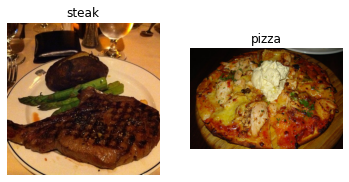

In [17]:
#Visualize the data 
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", 'pizza')

In [19]:
#Preprocess the data (prepare it for a model)


In [18]:
#Define directory dataset paths 

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'



In [19]:
#Our next step is to turn data in batches (batch is a small subset of the data the model looks at) 
!nvidia-smi

Wed Jun 30 00:34:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    32W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
#Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.) # Divides all pixal values by 225 for normiliaztion (between 0 and 1)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [21]:
#Load in our image data from our directorities and turn them into batches 

train_data = train_datagen.flow_from_directory(directory=train_dir, #Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode='binary', #Type of data we are working with
                                               batch_size=32) # Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
#Get a sample of a train data batch 

images, labels = train_data.next() #Get the next batch of images/labels in train data 
len(images), len(labels)

(32, 32)

In [23]:
 #Get the first two images 

 images[:2], images[1].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [24]:
#View the first batch of labels 
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [25]:
## Create a CNN model

CNN_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, #Filters is the number of sliding windows going across an input 
                         kernel_size=3, # the size of the sliding window going across the input
                         strides=1, # the size of the sliding window going across an input 
                         padding='valid', #if same. output shape is same as input shape, of valid, output shape gets compreseed 

                         activation='relu',
                         input_shape=(224,224,3)), # input layer (specifiy input shape)
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',),
  tf.keras.layers.MaxPool2D(pool_size=(2,2),
                            padding='valid'),
  tf.keras.layers.Conv2D(10,3,activation='relu',
                         strides=1,
                         padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
  

])

CNN_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

historyCNN = CNN_model.fit(train_data,
                           epochs=10,
                           steps_per_epoch= len(train_data),
                           validation_data= valid_data,
                           validation_steps = len(valid_data))


Epoch 1/10
47/47 [==============================] - 9s 192ms/step - loss: 0.5799 - accuracy: 0.7067 - val_loss: 0.4358 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 9s 185ms/step - loss: 0.4230 - accuracy: 0.8080 - val_loss: 0.4194 - val_accuracy: 0.7980
Epoch 3/10
47/47 [==============================] - 9s 187ms/step - loss: 0.3059 - accuracy: 0.8820 - val_loss: 0.3310 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 9s 188ms/step - loss: 0.2019 - accuracy: 0.9280 - val_loss: 0.3907 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 9s 186ms/step - loss: 0.1130 - accuracy: 0.9640 - val_loss: 0.4077 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 9s 184ms/step - loss: 0.0717 - accuracy: 0.9813 - val_loss: 0.4674 - val_accuracy: 0.8220
Epoch 7/10
47/47 [==============================] - 9s 184ms/step - loss: 0.0301 - accuracy: 0.9953 - val_loss: 0.4917 - val_accuracy: 0.8300
Epoch 

In [26]:

CNN_simple = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3, 
                          strides=1, 
                          padding='valid',
                          input_shape=(224,224,3),
                          activation='relu'),
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=4,
                          strides=1,
                          padding='valid',
                          activation='relu'),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,
                          activation='sigmoid') 
 ])

CNN_simple.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']    
 )
 
historySimple = CNN_simple.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=valid_data,
                                validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 1.1413 - accuracy: 0.5887 - val_loss: 0.5601 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5170 - accuracy: 0.7493 - val_loss: 0.5122 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3672 - accuracy: 0.8573 - val_loss: 0.4788 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.1726 - accuracy: 0.9420 - val_loss: 0.4657 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.0699 - accuracy: 0.9847 - val_loss: 0.4981 - val_accuracy: 0.7860


In [27]:
CNN_simple.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 219, 219, 10)      1610      
_________________________________________________________________
flatten_4 (Flatten)          (None, 479610)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 479611    
Total params: 481,501
Trainable params: 481,501
Non-trainable params: 0
_________________________________________________________________


In [28]:
len(train_data), len(test_data)

(47, 16)

In [29]:
model.evaluate(test_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.3510 - accuracy: 0.8320


[0.35100382566452026, 0.8320000171661377]

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [31]:
import pandas as pd 


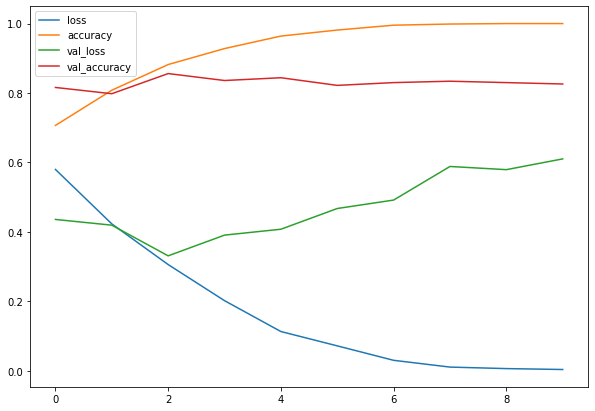

In [32]:
pd.DataFrame(historyCNN.history).plot(figsize=(10,7))

In [33]:
#Plot the validation and training curves seprately 

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics 
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) #how many epochs did we run for 

  #Plot loss 
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("loss"),
  plt.xlabel("epochs")
  plt.legend()


  #Plot accuracy 
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("accuracy"),
  plt.xlabel("epochs")
  plt.legend();

  

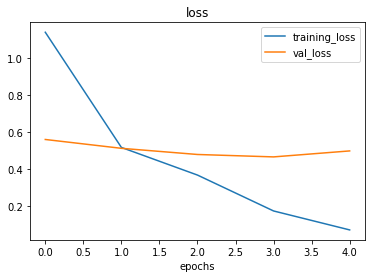

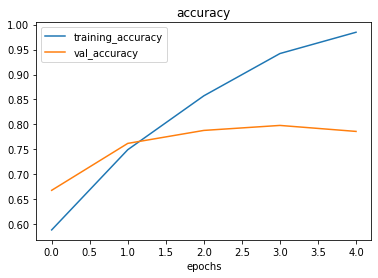

In [34]:
plot_loss_curves(historySimple)

## When a models validation loss starts to increase, its likely the model is overfitting the training dataset

# Ways to induce overfitting:

* Increse the number of conv layers
* Increse the number of conv filters 
* Add another dense layer to the output of our flattened layer 


## Reduce overfitting:

* Add data augmentation 
* Add regurlaizaition layers (maxpool2)
** Reducing overfiting is also known as regurlarization

In [35]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)


history5 = model5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6164 - accuracy: 0.6607 - val_loss: 0.4722 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4772 - accuracy: 0.7807 - val_loss: 0.3822 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4486 - accuracy: 0.7987 - val_loss: 0.3505 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4119 - accuracy: 0.8207 - val_loss: 0.3792 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3926 - accuracy: 0.8333 - val_loss: 0.3557 - val_accuracy: 0.8480


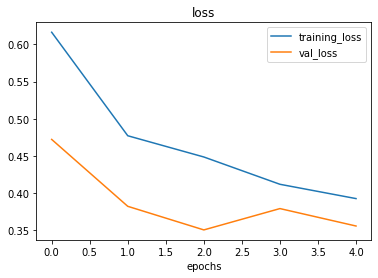

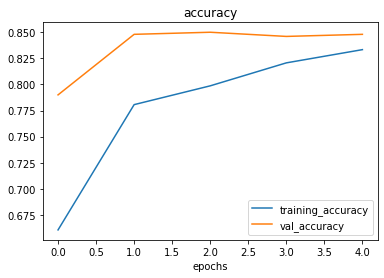

In [36]:
plot_loss_curves(history5)

In [37]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

#Finding data augmentation 

In [38]:
#Create Imagedatagenerator trainng instances with data augmentation 

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)


train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
print("Augmented training data")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=True) #for demonstartion only

#Create non_augmented train data batches 
print("Non augmented training data ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="binary")


print("Non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data 
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


In [40]:
  # Get some samples of the augmented data batches 
  

In [41]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_datagen_augmented.next() #Note labels not augmented


showing image number: 26
Showing image number 26


(-0.5, 223.5, 223.5, -0.5)

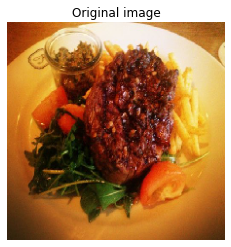

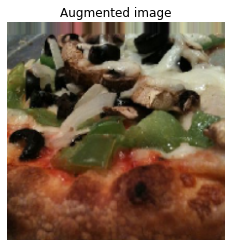

In [42]:
#Show oringal image and orignal image 
import random 
random_number = random.randint(0,31) # batch size 32

print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)

plt.figure()
print(f'Showing image number {random_number}')
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)




In [43]:
model6 = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          
                          input_shape=(224,224,3),
                          activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=2),
   tf.keras.layers.Conv2D(10,3,
                          activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10,3,
                         
                         activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation='sigmoid')

])

model6.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history6 = model6.fit(train_datagen_augmented,
                      epochs=5,
                      steps_per_epoch= len(train_datagen_augmented),
                      validation_data=test_data,
                      validation_steps= len(test_data))


Epoch 1/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6776 - accuracy: 0.5647 - val_loss: 0.5845 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6312 - accuracy: 0.6427 - val_loss: 0.5189 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.5905 - accuracy: 0.7073 - val_loss: 0.4923 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 20s 418ms/step - loss: 0.5612 - accuracy: 0.7140 - val_loss: 0.4413 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 20s 421ms/step - loss: 0.5453 - accuracy: 0.7500 - val_loss: 0.4259 - val_accuracy: 0.8240


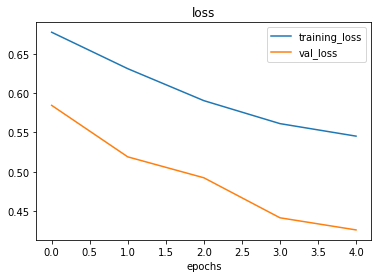

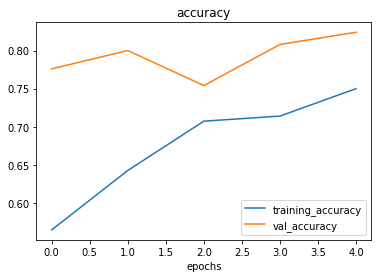

In [44]:
  plot_loss_curves(history6)

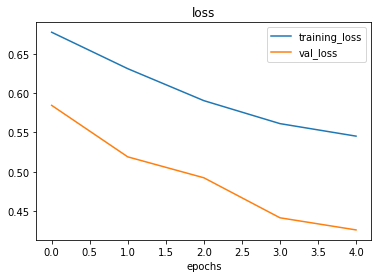

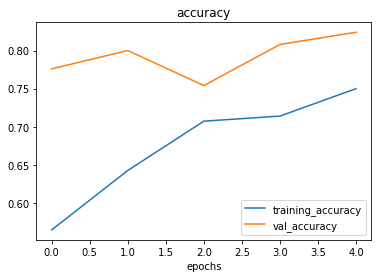

In [45]:
plot_loss_curves(history6)

In [46]:
#When shuffling trainaing data model gets exposed to all differnt kinds of data during training, giving it the ability to learn more features across wide array of images

In [47]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']

)


history7 = model7.fit(train_datagen_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_datagen_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 21s 426ms/step - loss: 0.6918 - accuracy: 0.5140 - val_loss: 0.6811 - val_accuracy: 0.5040
Epoch 2/10
47/47 [==============================] - 20s 424ms/step - loss: 0.6449 - accuracy: 0.6180 - val_loss: 1.0872 - val_accuracy: 0.5700
Epoch 3/10
47/47 [==============================] - 20s 423ms/step - loss: 0.6442 - accuracy: 0.6253 - val_loss: 0.4304 - val_accuracy: 0.8240
Epoch 4/10
47/47 [==============================] - 20s 424ms/step - loss: 0.5402 - accuracy: 0.7327 - val_loss: 0.4487 - val_accuracy: 0.7920
Epoch 5/10
47/47 [==============================] - 20s 423ms/step - loss: 0.5414 - accuracy: 0.7380 - val_loss: 0.3887 - val_accuracy: 0.8300
Epoch 6/10
47/47 [==============================] - 20s 422ms/step - loss: 0.4998 - accuracy: 0.7660 - val_loss: 0.4661 - val_accuracy: 0.8000
Epoch 7/10
47/47 [==============================] - 20s 420ms/step - loss: 0.4693 - accuracy: 0.7840 - val_loss: 0.6167 - val_accuracy: 0.7420

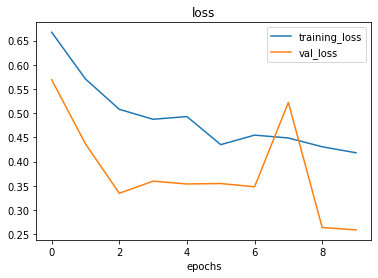

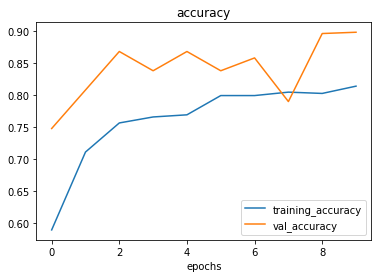

In [45]:
plot_loss_curves(history7)

#Making a perdiction on custom data 



In [57]:
#View an example image 

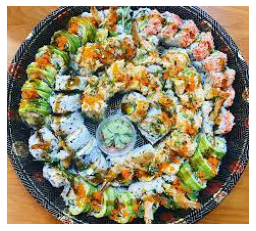

In [90]:
import matplotlib.image as mpimg

steak = mpimg.imread('Sushi.jpg')
plt.imshow(steak)
plt.axis(False);

In [63]:
#New data has to be preprocessed onto the same format as the data the model was trained on 

In [92]:
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor, reshapes it to img_shape, img_shape, color_channels
  """

  #Read in the file 
  img = tf.io.read_file(filename)
  #Decode readfile into tensor 
  img = tf.image.decode_image(img)
  #Resize image 
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale images between 0 and 1 
  img = img/255.
  
  return img

In [48]:
#Load and preprocess custom image 

steak = load_and_prep_image('Steak.jpg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.33389357, 0.5921569 , 0.740056  ],
        [0.3697679 , 0.5863095 , 0.74680877],
        [0.34841937, 0.58097243, 0.75236094],
        ...,
        [0.65657365, 0.72572714, 0.44102457],
        [0.6471288 , 0.6947482 , 0.5496478 ],
        [0.6577124 , 0.6969281 , 0.60281044]],

       [[0.36119947, 0.5946029 , 0.7411765 ],
        [0.36030912, 0.59242195, 0.73911065],
        [0.34934473, 0.59590334, 0.7480142 ],
        ...,
        [0.6406033 , 0.6945    , 0.49899644],
        [0.6489146 , 0.6923171 , 0.5687163 ],
        [0.64944464, 0.68473876, 0.6023858 ]],

       [[0.36582634, 0.59327734, 0.74016106],
        [0.3532463 , 0.5879302 , 0.7311975 ],
        [0.3762555 , 0.5969938 , 0.74087137],
        ...,
        [0.648385  , 0.6883658 , 0.5856805 ],
        [0.65164495, 0.6890301 , 0.6001488 ],
        [0.65602213, 0.69131625, 0.613235  ]],

       ...,

       [[0.8481793 , 0.7601192 , 0.7016461 ],
        [0.88

In [49]:
#Make a perdictions 
pred = model7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.8311487]], dtype=float32)

#Only outputs the perdiction probaility at the moment 

In [51]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [93]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import image located at filename, makes perdiciton with model,
  and plots the image with the predicited class as the title 
  """

  #Load and target image and preprocess it 
  img = load_and_prep_image(filename)

  #Make perdiciton have to exapand to 4 dims aswell
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get perdictied class 
  pred_class = class_names[int(tf.round(pred))]


  # Plot image and perdicited class 
  plt.imshow(img)
  plt.title(f"Prediction {pred_class}")
  plt.axis(False);

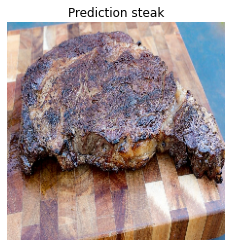

In [53]:
#Test model on custom image 
pred_and_plot(model7, "Steak.jpg")

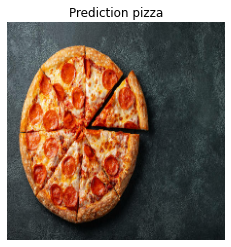

In [54]:
pred_and_plot(model7, "Pizza.jpg")

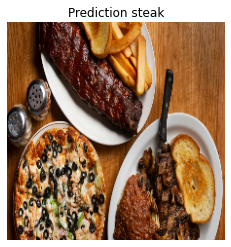

In [55]:
pred_and_plot(model7, 'pizzaSteak.jpg')

In [56]:
steak1 = load_and_prep_image("pizzaSteak.jpg")
steak1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[4.65090394e-01, 2.25874737e-01, 1.41100204e-02],
        [5.69112599e-01, 3.41661632e-01, 1.45583227e-01],
        [5.00837505e-01, 2.61621803e-01, 4.98571061e-02],
        ...,
        [5.97832859e-01, 3.93911242e-01, 2.40970060e-01],
        [5.99730790e-01, 3.97350639e-01, 2.65838295e-01],
        [5.92778385e-01, 3.92778426e-01, 2.79000401e-01]],

       [[4.64346677e-01, 2.25895986e-01, 1.41312731e-02],
        [5.32293856e-01, 3.12685996e-01, 1.12686016e-01],
        [5.16238630e-01, 2.80944556e-01, 6.91798329e-02],
        ...,
        [6.11756265e-01, 3.99991572e-01, 2.50971943e-01],
        [6.18621767e-01, 4.12879229e-01, 2.73244202e-01],
        [6.00509286e-01, 4.00509268e-01, 2.78940618e-01]],

       [[5.33001363e-01, 2.97707230e-01, 8.59425142e-02],
        [5.32404542e-01, 3.12796682e-01, 1.12796679e-01],
        [5.32981277e-01, 2.97687203e-01, 8.59224871e-02],
        ...,
        [6.03093743e-01, 3.91066

In [57]:
model7.predict(tf.expand_dims(steak1,axis=0))

array([[0.70649415]], dtype=float32)

Multi Class image classification 

In [49]:
#Import the data 

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-30 00:47:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   224MB/s    in 2.2s    

2021-06-30 00:47:26 (224 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [50]:
import os 

#Walk through 10 classes of image data 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 10 directories and 0 imag

In [51]:
#Setup train and test directories 

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"



In [52]:
#Lets get class names 

import pathlib
import numpy as np 

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3789299.jpg']
Image shape: (512, 512, 3)


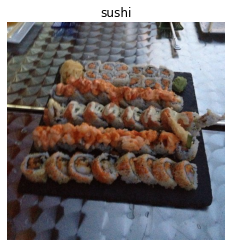

In [53]:
import random 
img = view_random_image(target_dir=train_dir,
                        target_class = random.choice(class_names))

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data1 = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)
test_data1 = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=32)
                                        



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [55]:
#Create a model

In [56]:
modelZ = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         input_shape=(224,224,3),
                         activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(10,
                         3,
                         activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10,3,
                  activation='relu'),
  tf.keras.layers.Conv2D(10,3,
                  activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')

])


modelZ.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

historyZ = modelZ.fit(train_data1, 
                      epochs=10,
                      steps_per_epoch=len(train_data1),
                      validation_data = test_data1,
                      validation_steps = len(test_data1))

Epoch 1/10
235/235 [==============================] - 42s 176ms/step - loss: 2.1368 - accuracy: 0.2263 - val_loss: 2.0343 - val_accuracy: 0.2672
Epoch 2/10
235/235 [==============================] - 41s 176ms/step - loss: 1.9336 - accuracy: 0.3271 - val_loss: 1.8819 - val_accuracy: 0.3300
Epoch 3/10
235/235 [==============================] - 42s 177ms/step - loss: 1.8108 - accuracy: 0.3801 - val_loss: 1.8523 - val_accuracy: 0.3560
Epoch 4/10
235/235 [==============================] - 41s 176ms/step - loss: 1.6632 - accuracy: 0.4341 - val_loss: 1.8685 - val_accuracy: 0.3524
Epoch 5/10
235/235 [==============================] - 42s 177ms/step - loss: 1.5297 - accuracy: 0.4883 - val_loss: 1.8942 - val_accuracy: 0.3556
Epoch 6/10
235/235 [==============================] - 41s 176ms/step - loss: 1.3881 - accuracy: 0.5389 - val_loss: 1.9225 - val_accuracy: 0.3500
Epoch 7/10
235/235 [==============================] - 41s 176ms/step - loss: 1.2178 - accuracy: 0.5945 - val_loss: 2.0332 - val_ac

In [58]:
modelZ.evaluate(test_data1)

79/79 [==============================] - 10s 127ms/step - loss: 3.0541 - accuracy: 0.3156


[3.0541155338287354, 0.3156000077724457]

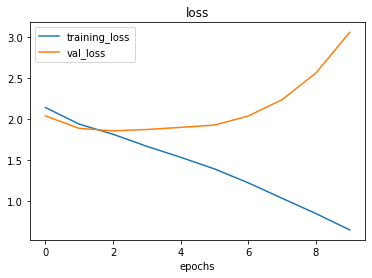

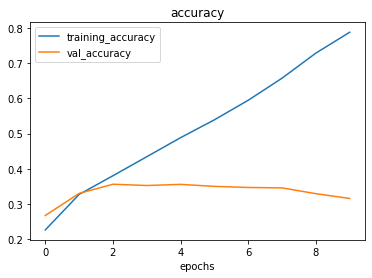

In [61]:
plot_loss_curves(historyZ)

#Loss want to go down, Accuracy you want to go up, model is currently overfiting on the training data 

Ways to induce overfitting:
Increse the number of conv layers
Increse the number of conv filters
Add another dense layer to the output of our flattened layer

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)


train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)
#print("Augmented training data")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=True) #for demonstartion only


In [69]:
train_datagen_augmented1 = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              )

train_datagen_augmented1 = train_datagen_augmented1.flow_from_directory(train_dir,
                                                                        target_size=(224,224),
                                                                        batch_size=32,
                                                                        class_mode='categorical',
                                                                        shuffle=True)

Found 7500 images belonging to 10 classes.


In [76]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(10,3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,
                           activation ='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
                          
])


model8.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history8 = model8.fit(train_datagen_augmented1,
                      epochs=10,
                      steps_per_epoch= len(train_datagen_augmented1),
                      validation_data=test_data1,
                      validation_steps=len(test_data1))

Epoch 1/10
235/235 [==============================] - 97s 412ms/step - loss: 2.2347 - accuracy: 0.1647 - val_loss: 2.1066 - val_accuracy: 0.2420
Epoch 2/10
235/235 [==============================] - 97s 411ms/step - loss: 2.1180 - accuracy: 0.2380 - val_loss: 2.0073 - val_accuracy: 0.2648
Epoch 3/10
235/235 [==============================] - 97s 412ms/step - loss: 2.0490 - accuracy: 0.2704 - val_loss: 1.9322 - val_accuracy: 0.3188
Epoch 4/10
235/235 [==============================] - 97s 412ms/step - loss: 2.0198 - accuracy: 0.2880 - val_loss: 1.9092 - val_accuracy: 0.3212
Epoch 5/10
235/235 [==============================] - 97s 411ms/step - loss: 1.9848 - accuracy: 0.3019 - val_loss: 1.9068 - val_accuracy: 0.3368
Epoch 6/10
235/235 [==============================] - 97s 413ms/step - loss: 1.9500 - accuracy: 0.3200 - val_loss: 1.8755 - val_accuracy: 0.3528
Epoch 7/10
235/235 [==============================] - 97s 413ms/step - loss: 1.9232 - accuracy: 0.3247 - val_loss: 1.7811 - val_ac

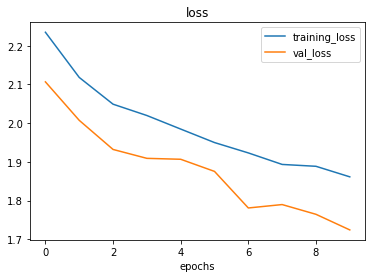

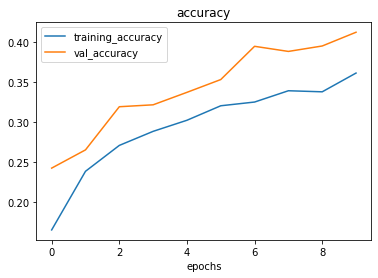

In [77]:
plot_loss_curves(history8)

In [78]:
model8.evaluate(test_data1)

79/79 [==============================] - 10s 126ms/step - loss: 1.7245 - accuracy: 0.4120


[1.7244845628738403, 0.41200000047683716]

In [79]:
#Simplifiy the model 

model9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
    
])

model9.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history9 = model9.fit(train_datagen_augmented1,
                      epochs=10,
                      steps_per_epoch=len(train_datagen_augmented1),
                      validation_data=test_data1,
                      validation_steps=len(test_data1))

Epoch 1/10
235/235 [==============================] - 98s 414ms/step - loss: 2.1931 - accuracy: 0.1857 - val_loss: 2.0876 - val_accuracy: 0.2324
Epoch 2/10
235/235 [==============================] - 97s 414ms/step - loss: 2.0807 - accuracy: 0.2525 - val_loss: 1.9532 - val_accuracy: 0.3312
Epoch 3/10
235/235 [==============================] - 97s 413ms/step - loss: 2.0157 - accuracy: 0.2872 - val_loss: 1.8654 - val_accuracy: 0.3524
Epoch 4/10
235/235 [==============================] - 97s 414ms/step - loss: 1.9628 - accuracy: 0.3153 - val_loss: 1.8566 - val_accuracy: 0.3588
Epoch 5/10
235/235 [==============================] - 97s 414ms/step - loss: 1.9244 - accuracy: 0.3263 - val_loss: 1.7624 - val_accuracy: 0.3960
Epoch 6/10
235/235 [==============================] - 97s 413ms/step - loss: 1.9005 - accuracy: 0.3421 - val_loss: 1.7642 - val_accuracy: 0.3912
Epoch 7/10
235/235 [==============================] - 97s 413ms/step - loss: 1.8694 - accuracy: 0.3481 - val_loss: 1.7581 - val_ac

In [82]:
model9.evaluate(test_data1)

79/79 [==============================] - 10s 127ms/step - loss: 1.8137 - accuracy: 0.3808


[1.813690185546875, 0.3808000087738037]

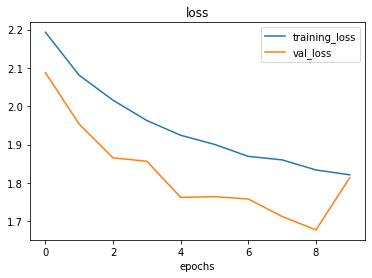

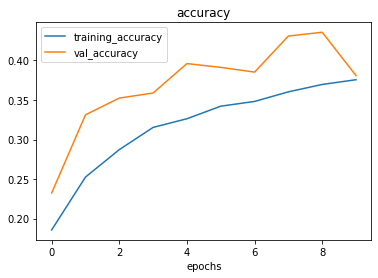

In [81]:
  plot_loss_curves(history9)

#How to improve a deeplearning model 
1. Adding layers,
2. Increase the amount of hidden layers
3. Change activaiton functions
4. Change the optimiziation functions
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer
8. Try Transfer Learning


In [131]:
#We have to reconfigure for it work on multiclass data

def pred_and_plot(model, filename, class_names=class_names):
  """
  Import image located at filename, makes perdiciton with model,
  and plots the image with the predicited class as the title 
  """

  #Load and target image and preprocess it 
  img = load_and_prep_image(filename)

  #Make perdiciton have to exapand to 4 dims aswell
  pred = model.predict(tf.expand_dims(img,axis=0))
 

  #Add logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot image and perdicited class 
  plt.imshow(img)
  plt.title(f"Prediction {pred_class}")
  plt.axis(False);

In [132]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

#Make perdcitions with new images 

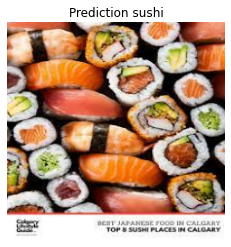

In [135]:
pred_and_plot(model=model8, 
              filename="sushi1.jpg",
              class_names=class_names)

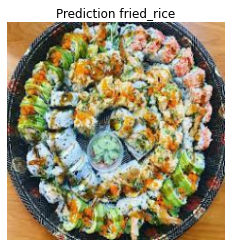

In [136]:
pred_and_plot(model8,
              'Sushi.jpg')

In [140]:
#Save model 
model8.save("saved_trained_model_8")

INFO:tensorflow:Assets written to: saved_trained_model_8/assets


In [141]:
load_model_8 = tf.keras.models.load_model("saved_trained_model_8")

In [142]:
load_model_8.evaluate(test_data1)

79/79 [==============================] - 10s 128ms/step - loss: 1.7245 - accuracy: 0.4120


[1.7244845628738403, 0.41200000047683716]

In [143]:
model8.evaluate(test_data1)

79/79 [==============================] - 10s 129ms/step - loss: 1.7245 - accuracy: 0.4120


[1.7244845628738403, 0.41200000047683716]